# Projeto Airbnb Porto -  Previsão de Preço de Imóvel 

## 1. Base de dados

Os dados foram obtidos no Inside Airbnb (http://insideairbnb.com). Este site fornece dados do Airbnb contendo conjuntos de dados extraídos de várias cidades ao redor do mundo onde O Airbnb está disponível. 
Coletamos o conjunto de dados (chamado listagens) com 75 variáveis 44569 observações das propriedades disponíveis no Plataforma Airbnb na cidade do Porto nos meses 12/2021, 03/2022, 06/2022 e 09/2022.

## 2. Importação das bibliotecas

In [499]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## 3. Importação dos arquivos

In [500]:
caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    df = pd.read_csv(caminho_bases / arquivo.name)
    base_airbnb = base_airbnb.append(df)
    
display(base_airbnb.head())

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,source
0,41339,https://www.airbnb.com/rooms/41339,20211208225259,2021-12-09,Porto city flat near the sea,Here you'll find all you need for your holiday...,In the surrounds you have Serralves Museum and...,https://a0.muscache.com/pictures/25727334/9578...,180050,https://www.airbnb.com/users/show/180050,...,4.47,4.59,29049/AL,t,1,1,0,0,0.16,NaN
1,55111,https://www.airbnb.com/rooms/55111,20211208225259,2021-12-09,Fontielas Houses |Floor1 in House with shared ...,First Floor in House with shared Swimingpool a...,NaN,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,https://www.airbnb.com/users/show/259711,...,4.77,4.77,7563/AL,f,3,3,0,0,0.18,NaN
2,73828,https://www.airbnb.com/rooms/73828,20211208225259,2021-12-09,Fontielas Houses |Floor0 in House with shared ...,Piso no rés-do-chão em moradia com piscina par...,NaN,https://a0.muscache.com/pictures/ffb19299-425c...,259711,https://www.airbnb.com/users/show/259711,...,4.88,4.63,7563/AL,f,3,3,0,0,0.10,NaN
3,86388,https://www.airbnb.com/rooms/86388,20211208225259,2021-12-09,A Formosa - a nest made for two,<b>The space</b><br />A big and bright bedroo...,NaN,https://a0.muscache.com/pictures/850099/b80470...,185209,https://www.airbnb.com/users/show/185209,...,4.84,4.77,6995/AL,f,7,1,6,0,1.14,NaN
4,87873,https://www.airbnb.com/rooms/87873,20211208225259,2021-12-09,Oporto Apartment Triplex,- Cozy apartment with great sun exposition<br ...,OPorto Apartment Triplex is located on Rua San...,https://a0.muscache.com/pictures/33686513/c54f...,480980,https://www.airbnb.com/users/show/480980,...,4.52,4.86,634/AL,f,3,1,2,0,1.65,NaN


In [501]:
print(base_airbnb.shape)

(44569, 75)


In [502]:
print(list(base_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

## 4. Escolha das colunas 

O grande número de colunas dificulta a análise e uma breve análise qualitativa indica que podemos reduzir significativamente este número o que tornará mais simples a manipulação da base de dados.
Vamos eliminar as colunas do tipo:
1. Nomes e Links;
2. Colunas duplicadas;
3. Colunas preenchidas com texto livre; e
4. Colunas em que todos ou quase todos os valores são iguais.

Para realização da análise qualitativa vamos exportar primeiras 1000 linhas do arquivo e então decidir quais colunas podem ser eliminadas.

In [503]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')


Após análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos as seguintes colunas:


In [504]:
colunas = ['id','last_scraped','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','latitude','longitude','property_type','accommodates','bedrooms','beds','amenities','price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
base_airbnb = base_airbnb.loc[:, colunas]
print('Colunas restantes: {}'.format(base_airbnb.shape[1]))

Colunas restantes: 23


## 5. Tratamento dos Dados e Análise Exploratória

### 5.1 Análise dos valores faltantes


Dentre as colunas selecionadas, observa-se volume significativo de informações nulas de forma que optamos por excluir as colunas em que mais de 10% das linhas possuem valores nulos

In [505]:
print(base_airbnb.isnull().sum())
print('Número de colunas: {}'.format(base_airbnb.shape[1]))
print('-'*60)
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > (0.1*base_airbnb.shape[0]):
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())
print('Colunas restantes: {}'.format(base_airbnb.shape[1]))

id                                0
last_scraped                      0
host_response_time             9202
host_response_rate             9202
host_acceptance_rate           7824
host_is_superhost                 6
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bedrooms                       4476
beds                            585
amenities                         0
price                             0
number_of_reviews                 0
review_scores_rating           5868
review_scores_accuracy         6059
review_scores_cleanliness      6052
review_scores_checkin          6065
review_scores_communication    6059
review_scores_location         6065
review_scores_value            6068
reviews_per_month              5868
dtype: int64
Número de colunas: 23
------------------------------------------------------------
id                     0
last_scraped           0
host_is_superhost      6
l

Agora vamos excluir as linhas nulas que sobraram:

In [506]:
base_airbnb = base_airbnb.dropna()
print('Por fim, ficamos com {} colunas e {} linhas'.format(base_airbnb.shape[1], base_airbnb.shape[0]))

Por fim, ficamos com 11 colunas e 43978 linhas


### 5.2 Estrurura e formatos

In [507]:
base_airbnb_trat = base_airbnb.copy()
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                     int64
last_scraped          object
host_is_superhost     object
latitude             float64
longitude            float64
property_type         object
accommodates           int64
beds                 float64
amenities             object
price                 object
number_of_reviews      int64
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                                2021-12-09
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental unit
accommodates                                                         5
beds                                                               3.0
amenities            ["Hangers", "Oven

### - price

A varíavel preço é nossa variável resposta e é contínua, por isso, temos que remover o $ e transforma-la para o tipo float.


In [508]:
base_airbnb_trat['price'] = base_airbnb_trat['price'].str.replace('$', '')
base_airbnb_trat['price'] = base_airbnb_trat['price'].str.replace(',', '')
base_airbnb_trat['price'] = base_airbnb_trat['price'].astype(np.float32, copy=False)
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                     int64
last_scraped          object
host_is_superhost     object
latitude             float64
longitude            float64
property_type         object
accommodates           int64
beds                 float64
amenities             object
price                float32
number_of_reviews      int64
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                                2021-12-09
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental unit
accommodates                                                         5
beds                                                               3.0
amenities            ["Hangers", "Oven

C:\Users\user\AppData\Local\Temp/ipykernel_14716/2260460192.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



### - last_scraped

Esta variável indica o mês em que o dado foi coletado no site do Airbnb. Também vamos criar uma variável com a informação do mês e ano.

In [509]:
base_airbnb_trat['last_scraped'] = pd.to_datetime(base_airbnb_trat['last_scraped'], errors='coerce', format='%Y-%m-%d')
base_airbnb_trat['mes_ano'] = base_airbnb_trat['last_scraped'].dt.strftime('%m/%Y')
base_airbnb_trat['ano'] = base_airbnb_trat['last_scraped'].dt.strftime('%Y')
base_airbnb_trat['mes'] = base_airbnb_trat['last_scraped'].dt.strftime('%m')
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                            int64
last_scraped         datetime64[ns]
host_is_superhost            object
latitude                    float64
longitude                   float64
property_type                object
accommodates                  int64
beds                        float64
amenities                    object
price                       float32
number_of_reviews             int64
mes_ano                      object
ano                          object
mes                          object
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                       2021-12-09 00:00:00
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental 

### - host_is_superhost
Por ser uma variável boleana vamos substituir True ou False, vamos substituir True por 1 e False por 0 respectivamente.

In [510]:
print(base_airbnb_trat['host_is_superhost'].value_counts())
base_airbnb_trat.loc[base_airbnb_trat.host_is_superhost=='t', 'host_is_superhost']=1
base_airbnb_trat.loc[base_airbnb_trat.host_is_superhost=='f', 'host_is_superhost']=0
print(base_airbnb_trat['host_is_superhost'].value_counts())

f    30337
t    13641
Name: host_is_superhost, dtype: int64
0    30337
1    13641
Name: host_is_superhost, dtype: int64


### - property_type



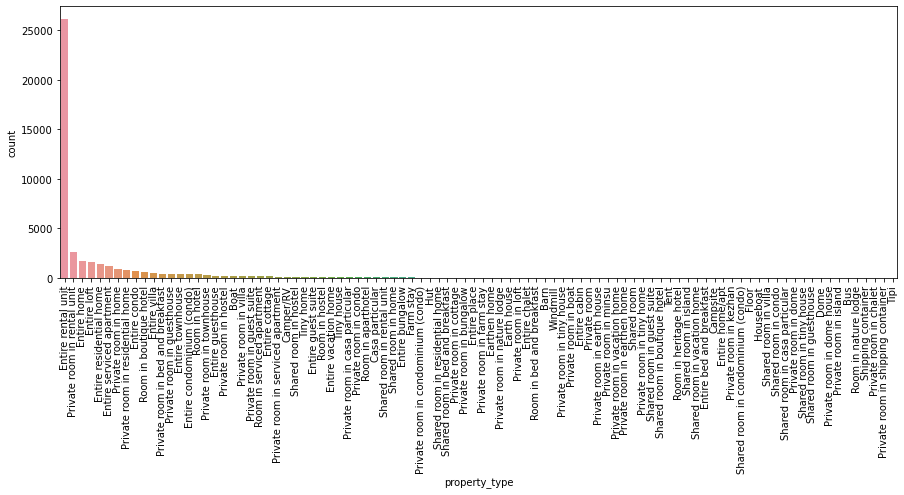

In [511]:
property_type=base_airbnb_trat['property_type'].value_counts()

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb_trat, order = base_airbnb_trat['property_type'].value_counts().index)
grafico.tick_params(axis='x', rotation=90)

Como temos muitas categorias vamos agrupar os tipos de propriedade com menos de 500 observações em uma categoria denominada "outros"

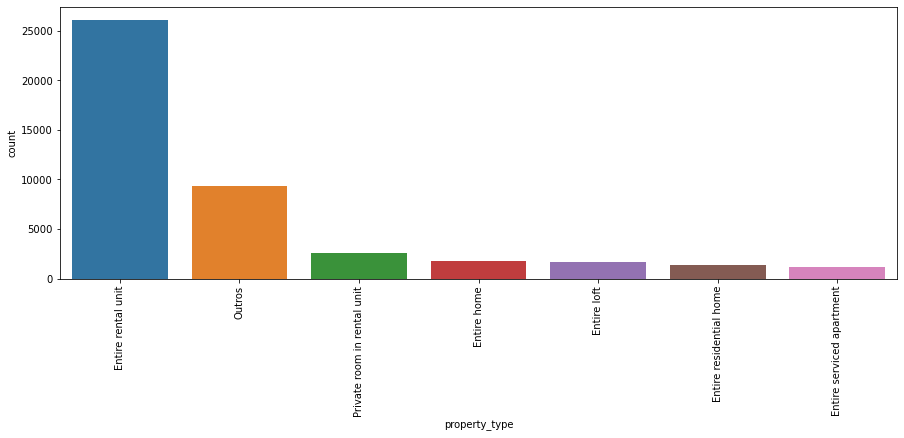

In [512]:
tabela_tipos_casa = base_airbnb_trat['property_type'].value_counts()
# print(tabela_tipos_casa)

colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 1000:
        colunas_agrupar.append(tipo)
# print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb_trat.loc[base_airbnb_trat['property_type']==tipo, 'property_type'] = 'Outros'
    
# print(base_airbnb_trat['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb_trat, order = base_airbnb_trat['property_type'].value_counts().index)
grafico.tick_params(axis='x', rotation=90)

### - amenities

A coluna que descreve as comodidade possui descrições diversas separadas por vírgula e neste caso contaremos as comodidades.

In [513]:
print(base_airbnb_trat['amenities'].iloc[1].split(','))
print(len(base_airbnb_trat['amenities'].iloc[1].split(',')))
base_airbnb_trat['n_amenities'] = base_airbnb_trat['amenities'].str.split(',').apply(len)

['["Hangers"', ' "Oven"', ' "Iron"', ' "Microwave"', ' "Kitchen"', ' "Fire extinguisher"', ' "Bed linens"', ' "Bathtub"', ' "Wifi"', ' "Essentials"', ' "Dishes and silverware"', ' "Free parking on premises"', ' "First aid kit"', ' "Long term stays allowed"', ' "Extra pillows and blankets"', ' "Hair dryer"', ' "High chair"', ' "Refrigerator"', ' "Coffee maker"', ' "Baby bath"', ' "Patio or balcony"', ' "Stove"', ' "Pack \\u2019n play/Travel crib"', ' "Host greets you"', ' "Luggage dropoff allowed"', ' "Hot water"', ' "Free street parking"', ' "Washer"', ' "Cooking basics"', ' "BBQ grill"', ' "Pool"', ' "TV"', ' "Baby safety gates"', ' "Backyard"', ' "Crib"]']
35


### 5.3 Análise dos outliers

Na seção a seguir vamos analisar a distribuição das variáveis númericas e identificar outliers.

#### Definição de funções
Vamos definir algumas funções para ajudar na análise de outliers das colunas.

In [514]:
# Função para cálculo dos limites mínimos e máximos a partir dos quais o valor observado é considerado outlier.

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

# Função para exclusão dos outliers para ser utilizada no caso da decisão de exclusão destas observações.

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

# Função para contar outliers

def cont_outliers (df, coluna):
    lim_inf, lim_sup = limites(df[coluna])
    qtd_outliers=df.loc[(df[coluna] < lim_inf) | (df[coluna] > lim_sup), :].shape[0]
    return df, qtd_outliers

# Função para construção do Boxplot com e sem outliers

def diagrama_caixa(coluna):
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(17,5)
    sns.boxplot(x=coluna, ax=ax1).set_title('BoxPlot')
    sns.boxplot(x=coluna, ax=ax2, showfliers=False).set_title('BoxPlot - Sem Outliers')

# Função para construção do Histograma
    
def histograma(coluna):
    plt.figure(figsize=(16, 5))
    sns.histplot(coluna).set_title('Histograma')   

### - price

Mais de 92% das observações possuem o preço inferior a 183.0.

Há propriedades cuja locação de dá por valor significavamente superior, chegando até 11,799.0. 

Nosso objetivo não passar por tentar modelar propriedades de luxo e com perfil tão peculiar e por isso vamos ignorar os outliers de preço.

(-33.0, 183.0)
O preço máximo observado é 11799.0
A quantidade de outliers é 3391, ou seja 7.71% dos dados


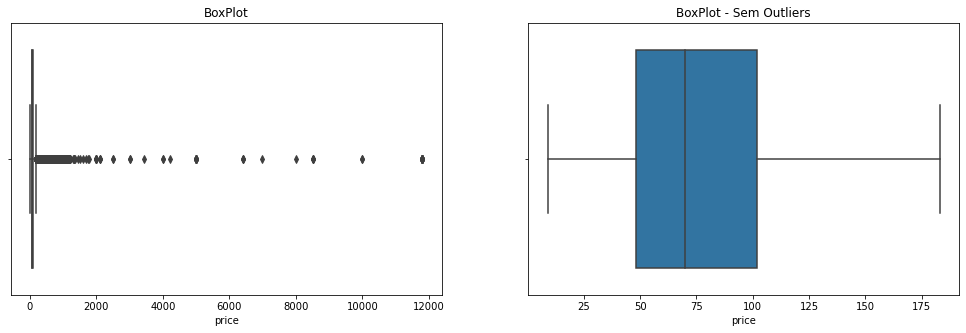

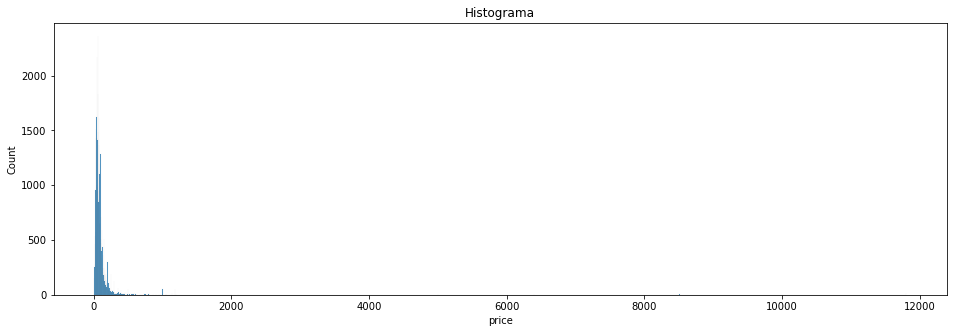

In [515]:
print(limites(base_airbnb_trat['price']))

diagrama_caixa(base_airbnb_trat['price'])

histograma(base_airbnb_trat['price'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'price')

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_price=base_airbnb_trat['price'].max()

print('O preço máximo observado é {}'.format(max_price))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))


Excluindo as observações cujos valores da variável 'price' são outliers.

In [516]:
base_airbnb_trat, linhas_removidas = excluir_outliers(base_airbnb_trat, 'price')
print('{} linhas removidas'.format(linhas_removidas))

3391 linhas removidas


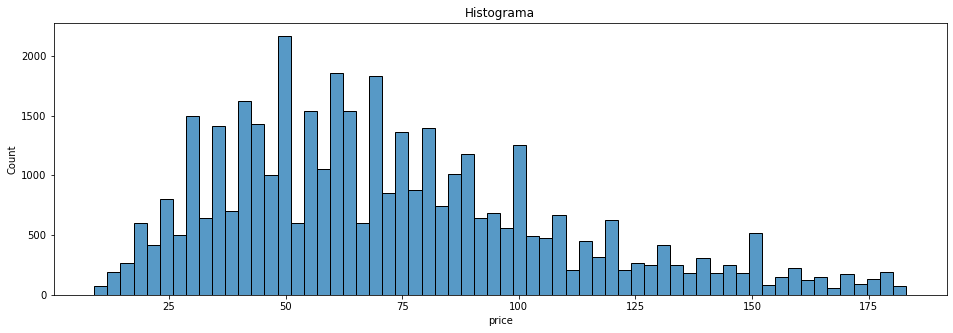

In [517]:
histograma(base_airbnb_trat['price'])

Com a remoção dos outliers, temos ainda uma calda pesada à direita, mas muito mais suave que a antes.

### - n_amenities

Como podemos observar a seguir, menos de 1% das observações contém outliers e a remoção dos outliers torna a distribuição dos dados pouco mais simétrica e por esta razão optamos pela exclusão das 327 observações.

(-5.0, 59.0)
O número máximo de amenidades é 93
A quantidade de outliers é 327, ou seja 0.81% dos dados


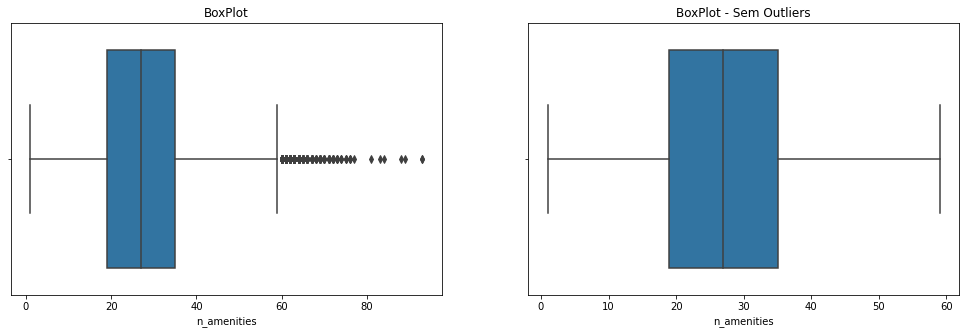

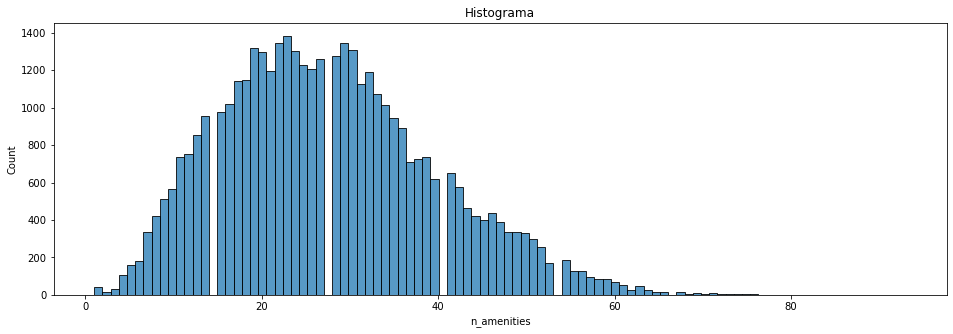

In [518]:
print(limites(base_airbnb_trat['n_amenities']))

diagrama_caixa(base_airbnb_trat['n_amenities'])

histograma(base_airbnb_trat['n_amenities'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'n_amenities')

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_amen=base_airbnb_trat['n_amenities'].max()

print('O número máximo de amenidades é {}'.format(max_amen))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))

327 linhas removidas


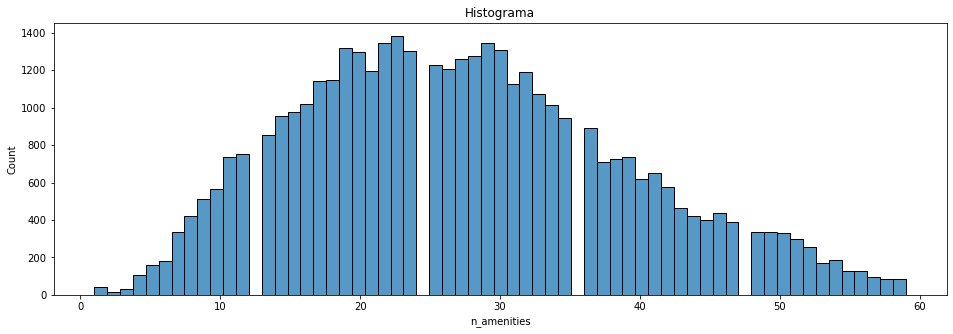

In [519]:
base_airbnb_trat, linhas_removidas = excluir_outliers(base_airbnb_trat, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))
histograma(base_airbnb_trat['n_amenities'])

Com a remoção dos outliers, temos ainda uma calda pesada à direita, entretanto é mais suave que a antes.

### - accommodates

(-1.0, 7.0)
O máximo de acomadações observado é 16
A quantidade de outliers é 1496, ou seja 3.72% dos dados


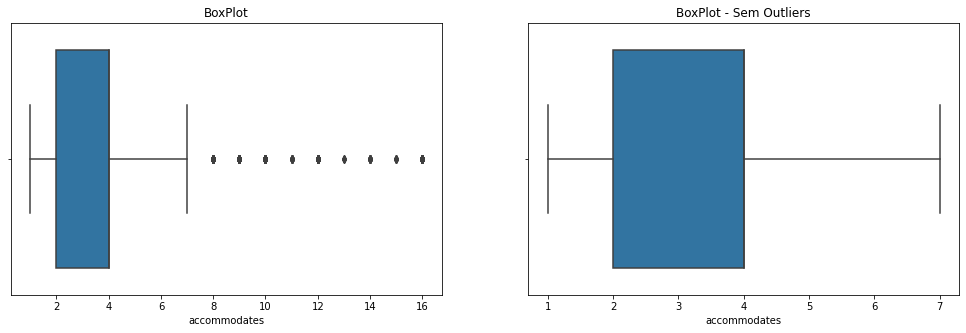

In [520]:
print(limites(base_airbnb_trat['accommodates']))

diagrama_caixa(base_airbnb_trat['accommodates'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'accommodates')

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_acom=base_airbnb_trat['accommodates'].max()

print('O máximo de acomadações observado é {}'.format(max_acom))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))

Como já excluímos os imóveis de luxo e o número de acomodações pode impactar no preço dos imóveis e o valor máximo não sugere erro vamos manter os outliers desta variável.

### - beds

(-2.0, 6.0)
O preço máximo observado é 20.0
A quantidade de outliers é 512, ou seja 1.27% dos dados


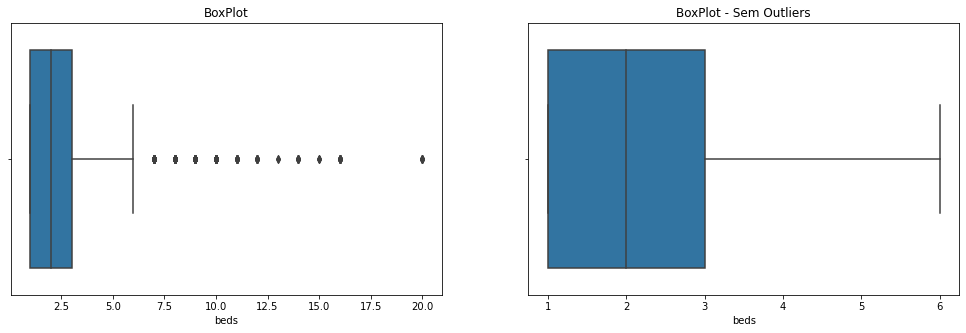

In [521]:
print(limites(base_airbnb_trat['beds']))

diagrama_caixa(base_airbnb_trat['beds'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'beds')

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_price=base_airbnb_trat['beds'].max()

print('O preço máximo observado é {}'.format(max_price))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))

### - number_of_reviews

(-79.5, 140.5)
O número máximo de reviwes observado é 796
A quantidade de outliers é 3965, ou seja 9.85% dos dados


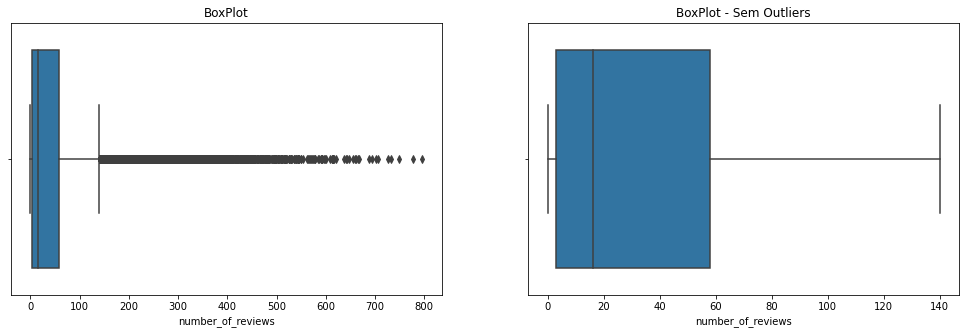

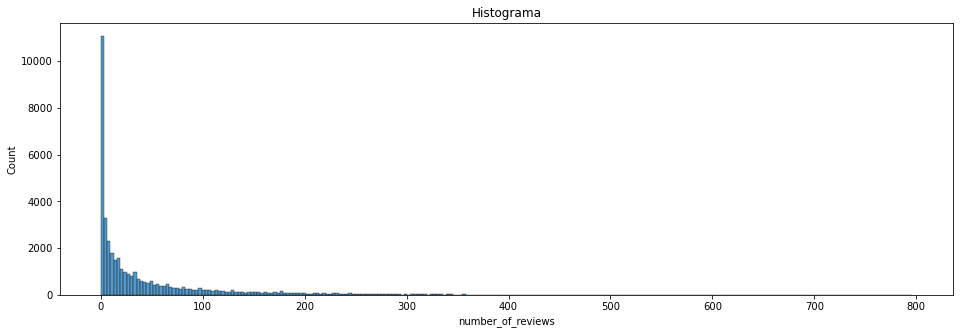

In [522]:
print(limites(base_airbnb_trat['number_of_reviews']))

diagrama_caixa(base_airbnb_trat['number_of_reviews'])

histograma(base_airbnb_trat['number_of_reviews'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'number_of_reviews')

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_reviews=base_airbnb_trat['number_of_reviews'].max()

print('O número máximo de reviwes observado é {}'.format(max_reviews))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))

Propriedades com número elevado de reviews são positivos para a contratação e pode impactar no preço e por isso vamos manter os outliers desta variável.

In [523]:
print('Iniciamos as análises exploratórias com {} colunas e {} linhas'.format(base_airbnb_trat.shape[1], base_airbnb_trat.shape[0]))

Iniciamos as análises exploratórias com 15 colunas e 40260 linhas


Entretanto, há variáveis que não usaremos no modelo como amenities, last_scraped, ano, mes_ano e id.

In [524]:
base_airbnb_trat.to_csv('base_airbnb_trat.csv', sep=';')

In [525]:
colunas = ['host_is_superhost','latitude','longitude','property_type','accommodates','beds','price','number_of_reviews','mes','n_amenities']
base_airbnb_trat = base_airbnb_trat.loc[:, colunas]
print('Colunas restantes: {}'.format(base_airbnb_trat.shape[1]))

Colunas restantes: 10


### 5.4 Análise da Correlação
Vamos analisar o grau de relacionamento linear entre as variáveis.

<AxesSubplot:>

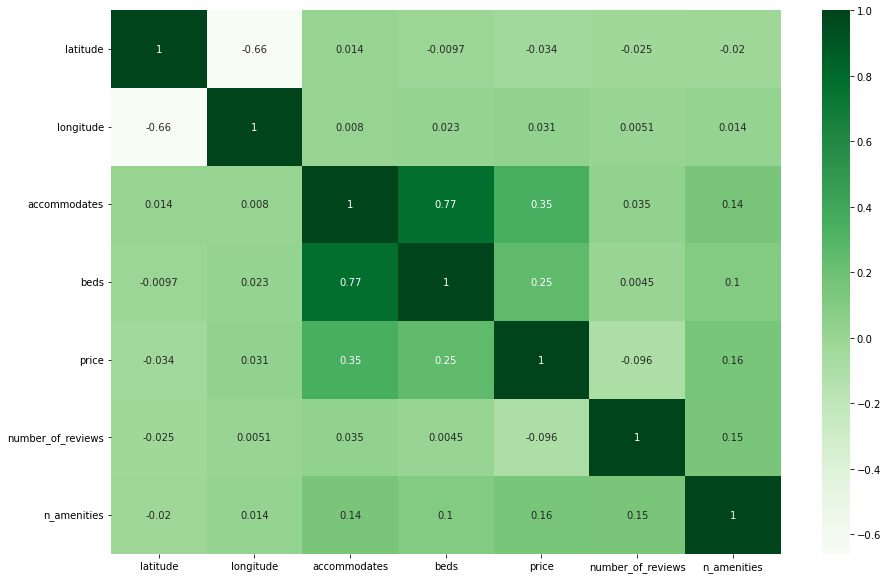

In [526]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb_trat.corr(), annot=True, cmap='Greens')
#print(base_airbnb.corr())

A quantidade de quartos e acomodações estão muito correlacionadas e como a correlação de acommodates e price é maior vamos manter aqui a variável acommodates.

In [527]:
base_airbnb_trat = base_airbnb_trat.drop('beds', axis=1)
print('Colunas restantes: {}'.format(base_airbnb_trat.shape[1]))

Colunas restantes: 9


### 5.5 Estatísticas descritivas variáveis numéricas
As estatísticas descritivas são um conjunto de medidas que visam descrever e resumir características importantes de um conjunto de dados.

In [528]:
base_airbnb_trat_cont = base_airbnb.copy()
colunas = ['latitude','longitude','accommodates','price','number_of_reviews','n_amenities']
base_airbnb_trat_cont = base_airbnb_trat.loc[:, colunas]
base_airbnb_trat_cont.describe()

,latitude,longitude,accommodates,price,number_of_reviews,n_amenities
count,40260.000000,40260.000000,40260.000000,40260.000000,40260.000000,40260.000000
mean,41.152744,-8.614133,3.571833,72.804695,47.640959,27.274690
std,0.071445,0.061141,1.778413,36.135536,76.686778,11.624668
min,40.757220,-8.782970,1.000000,9.000000,0.000000,1.000000
25%,41.143900,-8.620850,2.000000,45.000000,3.000000,19.000000
50%,41.149480,-8.612050,4.000000,66.000000,16.000000,26.000000
75%,41.157800,-8.604700,4.000000,93.000000,58.000000,35.000000
max,41.487250,-8.092400,16.000000,183.000000,796.000000,59.000000


Após o tratamento dos dados, constatou-se que os imóveis apresentam, em média, 3,57 acomodações, um preço médio de €72,80, cerca de 47 avaliações e 27 amenidades.

A localização média (latitude e longitude) apontam para uma região central próximo das atrações turistica do Porto:
<img src="Coordenadas_Medias.png">

In [529]:
display(base_airbnb_trat.head())

,host_is_superhost,latitude,longitude,property_type,accommodates,price,number_of_reviews,mes,n_amenities
0,0,41.15010,-8.66035,Entire rental unit,5,75.0,17,12,48
1,1,41.17481,-8.35362,Entire rental unit,5,66.0,14,12,35
2,1,41.17449,-8.35426,Entire rental unit,5,66.0,8,12,32
3,0,41.14918,-8.60922,Private room in rental unit,2,20.0,148,12,16
4,1,41.15786,-8.60427,Entire rental unit,4,69.0,192,12,30


### 5.6 Visualização de Mapa das Propriedades

Vamos criar um mapa que exibe um pedaço da nossa base de dados aleatório (50.000 propriedades) para ver como as propriedades estão distribuídas pela cidade e também identificar os locais de maior preço 


In [530]:
amostra = base_airbnb_trat_cont.sample(n=10000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=11,
                        mapbox_style='stamen-terrain')
mapa.show()

O Mapa mostra que áreas mais próximas dos principais pontos turísticos possuem concentração de imoveis mais caros.
<img src="porto.png">

A Ponte Dom Luís I é uma das principais atrações turísticas do Porto, em Portugal. A ponte, que foi inaugurada em 1886, é uma das pontes mais icônicas do país e é considerada uma obra-prima da engenharia.

Com seus 172 metros de comprimento e 44 metros de altura, a ponte Dom Luís I conecta o Porto ao município de Vila Nova de Gaia, atravessando o rio Douro. A ponte é constituída por dois níveis, com o nível inferior reservado para a circulação de veículos e o nível superior para a circulação de pedestres e do metrô.

A vista da Ponte Dom Luís I é espetacular e pode ser apreciada de vários pontos da cidade, como a Ribeira do Porto, o Mosteiro da Serra do Pilar, a Ponte da Arrábida e a margem sul do rio Douro em Vila Nova de Gaia.

Além disso, é possível caminhar pela ponte Dom Luís I e desfrutar da vista panorâmica da cidade e do rio Douro. A ponte também é um ponto popular para a prática de atividades ao ar livre, como corrida, ciclismo e skate.
<img src="ponte.jpg">
Foto: Adriano Caetano de Freitas

O Centro Histórico do Porto é um dos locais mais charmosos e ricos em história da cidade. Foi declarado Patrimônio Mundial pela UNESCO em 1996, graças ao seu valor cultural e arquitetônico.

O Centro Histórico do Porto é composto por diversas ruas, praças e edifícios históricos, incluindo a Sé do Porto, a Torre dos Clérigos, a Estação de São Bento, a Rua das Flores, a Ribeira e o Mercado do Bolhão.
<img src="centro_historico.jpg">
Foto: Adriano Caetano de Freitas

A Ribeira é um bairro histórico do Porto, localizado nas margens do rio Douro. É uma das áreas mais antigas e pitorescas da cidade, e é considerada Patrimônio Mundial pela UNESCO desde 1996.

A Ribeira é famosa por suas ruas estreitas e sinuosas, seus edifícios coloridos e suas vistas deslumbrantes do rio Douro. É um dos principais destinos turísticos da cidade, com uma grande variedade de restaurantes, bares e lojas.

Ao caminhar pela Ribeira, é possível apreciar a arquitetura histórica da cidade, incluindo edifícios antigos e igrejas, bem como as casas tradicionais de pescadores, que ainda estão presentes no bairro. É também um local popular para passeios de barco pelo rio Douro, onde é possível desfrutar de vistas panorâmicas da cidade e das suas pontes.
<img src="ribeira.jpg">
Foto: Adriano Caetano de Freitas

As caves de vinho do Porto são um dos principais atrativos turísticos da cidade do Porto, em Portugal. Estas caves, localizadas em Vila Nova de Gaia, do outro lado do rio Douro, são responsáveis por produzir e armazenar o famoso vinho do Porto.

As caves estão abertas para visitação, e oferecem uma experiência única e imersiva, que inclui visitas guiadas pelas instalações, degustações de vinho, e informações sobre o processo de produção do vinho do Porto.

Algumas das caves mais famosas e importantes incluem a Ferreira, a Graham's, a Sandeman, a Taylor's e a Cálem, cada uma com sua própria história e tradição.
<img src="vinho.jpg">
Foto: Adriano Caetano de Freitas

## 6 Variável dummy

A variável dummy (ou "dummie") é uma variável binária que é usada em estatística e análise de dados para representar a presença ou ausência de uma determinada característica ou condição. Ela é codificada como 1 se a característica ou condição está presente e 0 se não está.
Vamos criar as variáveis dummies a partir das variáveis property_type e mes

In [531]:
display(base_airbnb_trat.head())

,host_is_superhost,latitude,longitude,property_type,accommodates,price,number_of_reviews,mes,n_amenities
0,0,41.15010,-8.66035,Entire rental unit,5,75.0,17,12,48
1,1,41.17481,-8.35362,Entire rental unit,5,66.0,14,12,35
2,1,41.17449,-8.35426,Entire rental unit,5,66.0,8,12,32
3,0,41.14918,-8.60922,Private room in rental unit,2,20.0,148,12,16
4,1,41.15786,-8.60427,Entire rental unit,4,69.0,192,12,30


In [532]:
colunas_categorias = ['property_type', 'mes']
base_airbnb_trat_dummy = pd.get_dummies(data=base_airbnb_trat, columns=colunas_categorias)
display(base_airbnb_trat_dummy.head())

,host_is_superhost,latitude,longitude,accommodates,price,number_of_reviews,n_amenities,property_type_Entire home,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Outros,property_type_Private room in rental unit,mes_03,mes_06,mes_09,mes_12
0,0,41.15010,-8.66035,5,75.0,17,48,0,0,1,0,0,0,0,0,0,0,1
1,1,41.17481,-8.35362,5,66.0,14,35,0,0,1,0,0,0,0,0,0,0,1
2,1,41.17449,-8.35426,5,66.0,8,32,0,0,1,0,0,0,0,0,0,0,1
3,0,41.14918,-8.60922,2,20.0,148,16,0,0,0,0,0,0,1,0,0,0,1
4,1,41.15786,-8.60427,4,69.0,192,30,0,0,1,0,0,0,0,0,0,0,1


## 7. Modelos de predição

Vamos testar três tipos de modelos diferentes: Regressão Linear, Random Forest e Extra Trees Regressor. Nosso objetivo é testar as hipóteses declaradas inicialmente, ou seja, se a localização e o período do ano (alta e baixa temporada) são preditores importantes para o preço de locação de um imóvel no Airbnb, e se as variáveis selecionadas combinadas nos modelos são capazes de predizer com precisão o preço de locação.

- Métricas de Avaliação

Vamos usar aqui o R² que vai nos dizer o quanto da variabilidade do preço é explicado pelo modelo<br>
-> Quanto mais próximo de 100%, melhor

Vou calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso modelo está errando. <br>
-> Quanto menor for o erro, melhor

In [533]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [534]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

y = base_airbnb_trat_dummy['price']
X = base_airbnb_trat_dummy.drop('price', axis=1)

- Separa os dados em treino e teste

Para realizar a análise de predição de preços de locação de um imóvel no Airbnb, é importante separar os dados em conjuntos de treino e teste. O conjunto de treino será usado para treinar os modelos e o conjunto de teste será usado para avaliar o desempenho dos modelos em dados não vistos anteriormente.

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [536]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:59.65%
RSME:22.96
Modelo LinearRegression:
R²:28.17%
RSME:30.63
Modelo ExtraTrees:
R²:48.56%
RSME:25.92


O modelo com melhor resultado é o Random Forest, entretanto, o modelo é capaz de explicar apenas 59,45% da variação do preço e por tanto, não é um bom modelo para previsão de preço.
Vamos observar a seguir a importância de cada uma das variáveis para o modelo.

,0
latitude,0.208740
longitude,0.184605
accommodates,0.141422
number_of_reviews,0.136024
n_amenities,0.130302
property_type_Private room in rental unit,0.048285
mes_06,0.023077
host_is_superhost,0.023008
mes_09,0.021318
property_type_Outros,0.020450


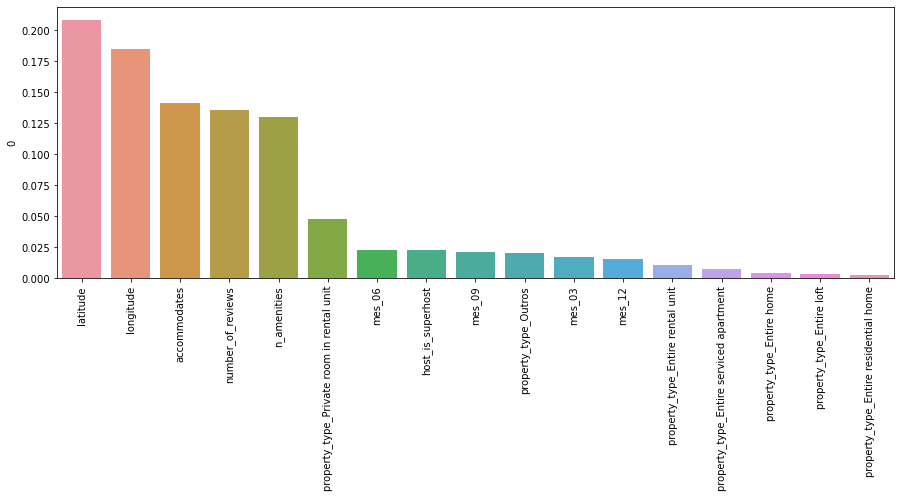

In [537]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

Embora a qualidade de predição não seja alta, podemos comprovar que a localização, o número de acomodações e a alta temporada são as variáveis mais importantes para explicar o preço de locação de um imóvel no Airbnb no Porto.
A variável property_type não parece ser importante e por esta razão vou removê-la e observar o resultado dos modelos.

In [538]:
base_airbnb_trat_final = base_airbnb_trat.drop('property_type', axis=1)
display(base_airbnb_trat_dummy_final.head())

,host_is_superhost,latitude,longitude,accommodates,price,number_of_reviews,n_amenities,mes_03,mes_06,mes_09,mes_12
0,0,41.15010,-8.66035,5,75.0,17,48,0,0,0,1
1,1,41.17481,-8.35362,5,66.0,14,35,0,0,0,1
2,1,41.17449,-8.35426,5,66.0,8,32,0,0,0,1
3,0,41.14918,-8.60922,2,20.0,148,16,0,0,0,1
4,1,41.15786,-8.60427,4,69.0,192,30,0,0,0,1


In [539]:
colunas_categorias = ['mes']
base_airbnb_trat_dummy_final = pd.get_dummies(data=base_airbnb_trat_final, columns=colunas_categorias)
display(base_airbnb_trat_dummy_final.head())

,host_is_superhost,latitude,longitude,accommodates,price,number_of_reviews,n_amenities,mes_03,mes_06,mes_09,mes_12
0,0,41.15010,-8.66035,5,75.0,17,48,0,0,0,1
1,1,41.17481,-8.35362,5,66.0,14,35,0,0,0,1
2,1,41.17449,-8.35426,5,66.0,8,32,0,0,0,1
3,0,41.14918,-8.60922,2,20.0,148,16,0,0,0,1
4,1,41.15786,-8.60427,4,69.0,192,30,0,0,0,1


In [540]:
y = base_airbnb_trat_dummy_final['price']
X = base_airbnb_trat_dummy_final.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [541]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:57.15%
RSME:23.66
Modelo LinearRegression:
R²:23.57%
RSME:31.60
Modelo ExtraTrees:
R²:44.08%
RSME:27.03


,0
latitude,0.240644
longitude,0.209688
accommodates,0.152431
number_of_reviews,0.148508
n_amenities,0.142662
host_is_superhost,0.025798
mes_06,0.023189
mes_09,0.022071
mes_03,0.018156
mes_12,0.016852


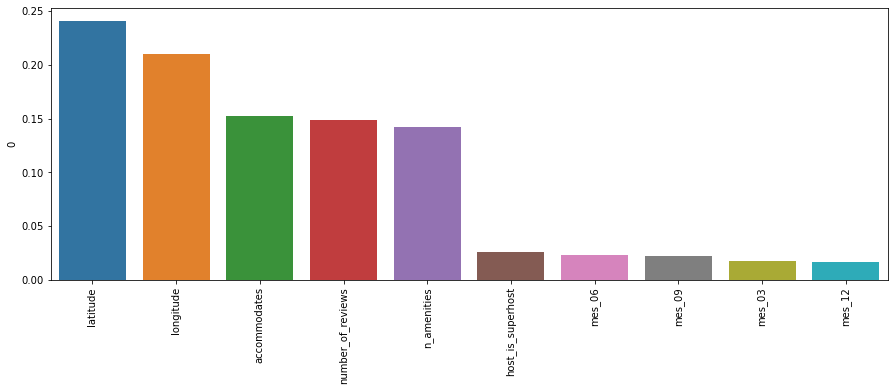

In [542]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

O Random Foreste continua a ser o modelo com o melhor desempenho, mas perde um pouco de qualidade.